![](https://i.imgur.com/0AUxkXt.png)

# Lab 2 - Pandas & Seaborn

## Import libraries

In [0]:
# Your code here
# Hint: copy from the lecture notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

In this Lab we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [0]:
# Run this code
tips = sns.load_dataset('tips')
type(tips)

pandas.core.frame.DataFrame

### Overview

**Show the first 3 rows of the data**

In [0]:
# Your code here

tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Show the last 2 rows of the data

In [0]:
# Your code here
tips[-2:]
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Show 4 randoms rows

In [0]:
tips.sample(4)


,total_bill,tip,sex,smoker,day,time,size
139,13.16,2.75,Female,No,Thur,Lunch,2
228,13.28,2.72,Male,No,Sat,Dinner,2
122,14.26,2.50,Male,No,Thur,Lunch,2
68,20.23,2.01,Male,No,Sat,Dinner,2


### Print a concise summary of the data

Print information about the data including the index dtype and column dtypes, non-null values and memory usage.

In [0]:
# Your code here
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### Generate descriptive statistics

A descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [0]:
# Your code here
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## EDA - Exploratory Data Analysis

**What is the min/max of tip?**

In [0]:
print(tips['tip'].min())
print(tips['tip'].max())
# Your code here

1.0
10.0


**The restaurant is open on which days of the week?**

*Hint: unique values of the column `day`*

In [0]:
# Your code here

tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

**List of unique values in column `time`**

In [0]:
# Your code here

tips['time'].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

**What is the range of table size?**

In [0]:
# Your code here
a=tips['size'].max()
b=tips['size'].min()
print(a,b)

6 1


**How many man/woman paid for the dish?**


In [0]:
# Your code here
tips[tips['sex']=='Female'].count()

tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


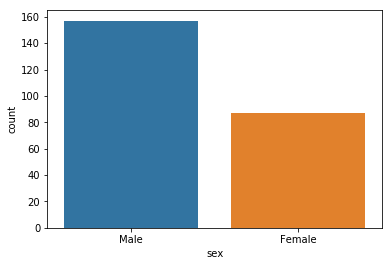

In [0]:
sns.countplot(x='sex',data=tips)

In [0]:
# Your code here
tips[tips['sex']=='Male'].count()

total_bill    157
tip           157
sex           157
smoker        157
day           157
time          157
size          157
dtype: int64

**What is the percentage of smoker table and their revenue?**

In [0]:
all=tips['total_bill'].sum()
tips4=tips.groupby('smoker').sum()
tips4['percent']=tips4['total_bill']/all *100
tips4


# Your code here

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,39.984092
No,2897.43,451.77,403,60.015908


** **bold text**List 3 tables that have the most expensive bill**

In [0]:
# Your code here
tips.sort_values(by='total_bill',ascending=False).head(3)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


### Group by - Example

**What is the best day to work - maximum tips (sum and percents)?**

In [33]:
tips2 = tips.groupby('day').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


**Your turn: Who eats more (and tips more)? smokers or non smokers?**

In [36]:
# Your code here
tips.groupby('smoker').mean()

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


### Data Visualization using Seaborn

**Visualize # of tables per day**

*Hint: using the seaborn's function **countplot()** with `x=day` and `data=tips`*

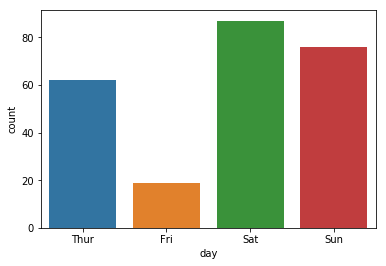

In [37]:
# Your code here
sns.countplot(x='day',data=tips)

**Visualize # of smoker and non-smoker tables**

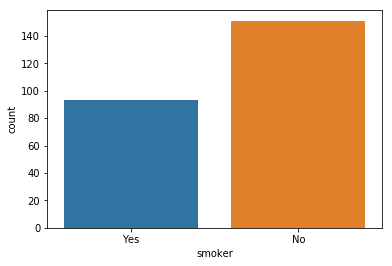

In [38]:
# Your code here

sns.countplot(x='smoker',data=tips)

**Visualize # of male/female customers who pay**

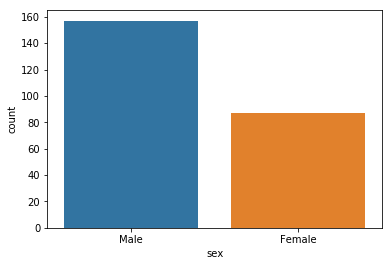

In [39]:
# Your code here
sns.countplot(x='sex',data=tips)

**Analyze the distribution of payments of male and female in different days**

> Indented block



*Hint: countplot with `hue='sex'`*

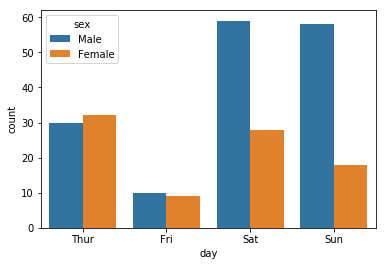

In [40]:
# Your code here

sns.countplot(x='day',hue='sex',data=tips)

**Analyze the # of tables in different time (lunch or dinner) and days**

In [0]:
# Your code here

sns.countplot(x='day',hue='time',data=tips)

**Example: Visualize the distribution of the total bill**


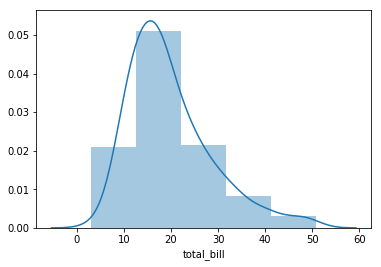

In [0]:
sns.distplot(tips['total_bill'],bins=5)

**Visualize the distribution of the tip**

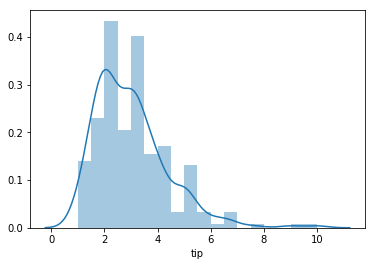

In [41]:
# Your code here
sns.distplot(tips['tip'])

**Example: Scatter plot of tip and total bill**

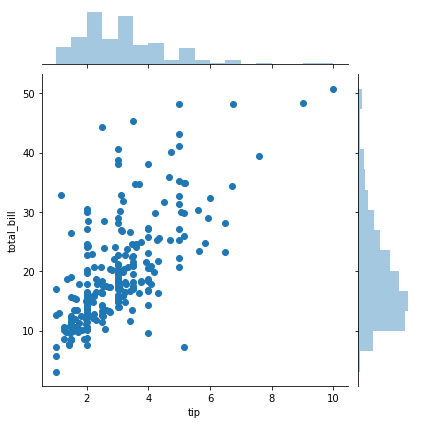

In [42]:
sns.jointplot(x='tip', y='total_bill', data=tips)

**Add one more parameter `kind='hex'` to the previous   `jointplot()` function**

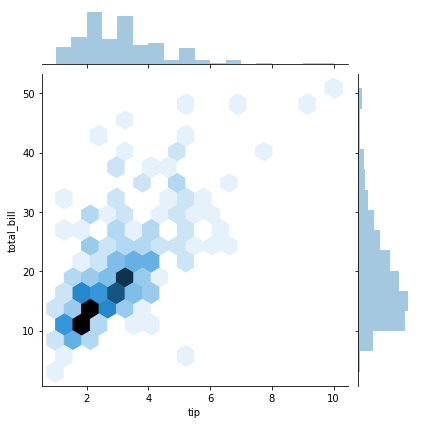

In [43]:
# Your code here

sns.jointplot(x='tip', y='total_bill',kind='hex', data=tips)

**Let's try with `kind='kde'` (KDE - Kernel Density Estimation)**

In [0]:
# Your code here
sns.jointplot(x='tip', y='total_bill',kind='kde', data=tips)

**Analyze the relationship between `size` and `tip`**

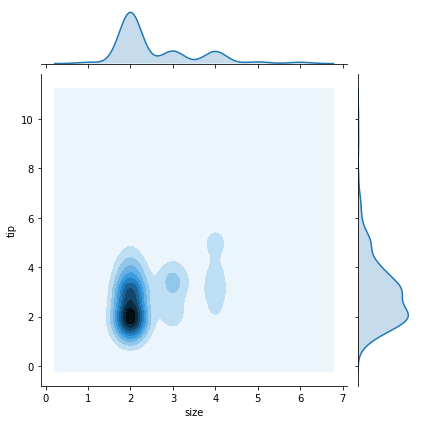

In [44]:
# Your code here
sns.jointplot(x='size', y='tip',kind='kde', data=tips)

**Correlation Matrix**

Show the correlation matrix and comfirm the analytics you have from previous steps.

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


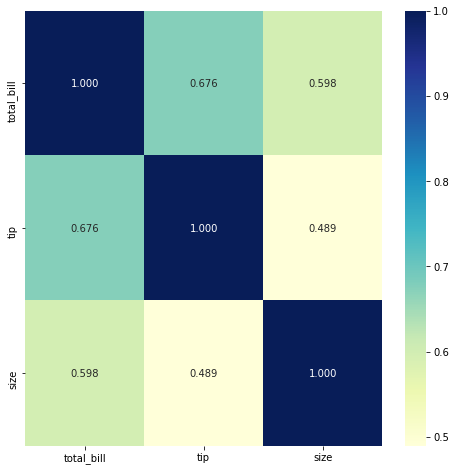

In [45]:
# Your code here)
plt.figure(figsize=(8,8))
sns.heatmap(tips.corr(), annot=True, fmt='.3f', cmap='YlGnBu')
tips.corr()

**Box plot, Swarm plot and Violin plot**

![](https://i.imgur.com/5Lo17qp.png)

**Implement the seaborn's function `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

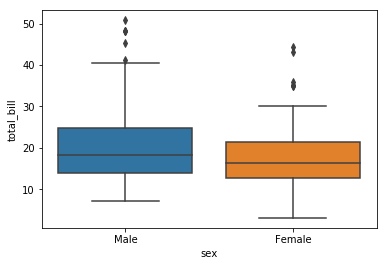

In [46]:
# Your code here
sns.boxplot(x='sex',y='total_bill',data=tips)

**Implement `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

In [0]:
# Your code here

**Add `hue='smoker'` to the previous `boxplot()`**

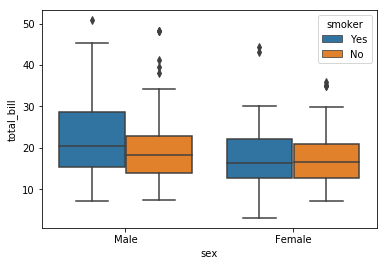

In [47]:
# Your code here
sns.boxplot(x='sex',y='total_bill',hue='smoker',data=tips)

**Implement `swarmplot()` with: `x='day', y='tip', hue='smoker', data=tips`**

In [0]:
# Your code here
sns.swarmplot(x='day',y='tip',hue='smoker',data=tips)

**Implement previous chart with `violinplot()`**

In [0]:
# Your code here

sns.violinplot(x='day',y='tip',hue='smoker',data=tips)

### Bonus

**Total revenue per day**

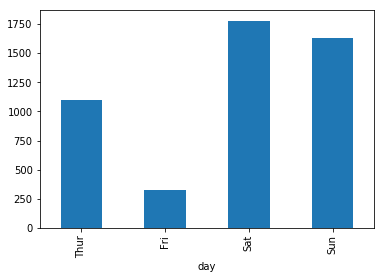

In [48]:
tips.groupby('day').sum()['total_bill'].plot(kind='bar')

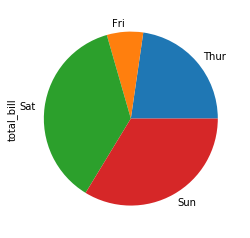

In [49]:
tips.groupby('day').sum()['total_bill'].plot(kind='pie')

**Pie chart of table size in percentage**

1      4
2    156
3     38
4     37
5      5
6      4
Name: size, dtype: int64


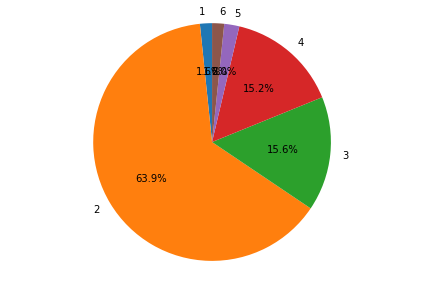

In [62]:
# Pie chart
labels = []
sizes = []

labels = tips['size'].value_counts().sort_index()
print(labels)
for index, size in enumerate(labels):
    sizes.append(size)
 
f,ax1 = plt.subplots()
ax1.pie(sizes, labels=labels.index, autopct='%1.1f%%',startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Great Job!!